In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [118]:
df=yf.download("^GSPC",start="2016-01-01",progress=False)


In [119]:
def MACD (df):
    df["EMA12"]=df["Adj Close"].ewm(span=12).mean()
    df["EMA26"]=df["Adj Close"].ewm(span=26).mean()
    df["MACD"]=df["EMA12"]-df["EMA26"]
    df["signal_line"]=df["MACD"].ewm(span=9).mean()
    print("Function Working")
MACD(df)

Function Working


MACD Line = 12 Period EMA - 26 Period EMA

The strategy is simple,if MACD line crosses above signal line then buy the stock if macd crosses bellow the signal line, sell the stock

In [120]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal_line
Date,,,,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,2012.660034,2012.660034,0.000000,0.000000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,2014.853745,2014.762881,0.090864,0.050480
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,2005.254804,2005.959237,-0.704433,-0.258911
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,1985.631794,1988.383736,-2.751942,-1.103433
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,1968.351422,1972.996038,-4.644616,-2.156855
...,...,...,...,...,...,...,...,...,...,...
2022-01-19,4588.029785,4611.549805,4530.200195,4532.759766,4532.759766,3387370000,4659.432432,4676.321358,-16.888926,6.981640
2022-01-20,4547.350098,4602.109863,4477.950195,4482.729980,4482.729980,3473060000,4632.247439,4661.981256,-29.733817,-0.361451
2022-01-21,4471.379883,4494.520020,4395.339844,4397.939941,4397.939941,3945810000,4596.200132,4642.422640,-46.222508,-9.533662


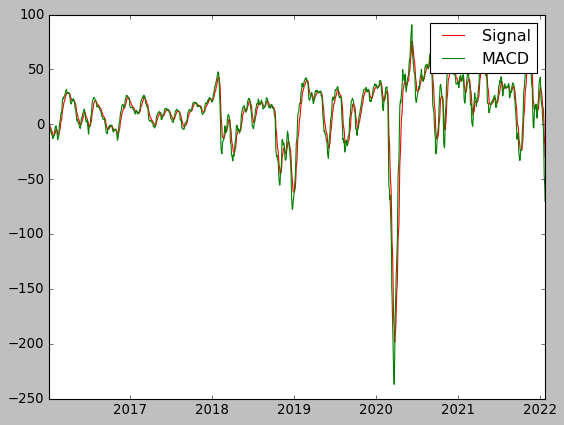

In [121]:
plt.plot(df["signal_line"],label="Signal", color="red")
plt.plot(df["MACD"],label="MACD", color="green")
plt.legend()
plt.rcParams['lines.linewidth'] = 1
plt.style.use("classic")

In [122]:
Buy, Sell =[],[]
for i in range(2,len(df)):
    if df["MACD"].iloc[i]> df["signal_line"].iloc[i] and df["MACD"].iloc[i-1]<df["signal_line"].iloc[i-1]:
        Buy.append(i) # getting the row number of buying condition
    elif  df["MACD"].iloc[i]< df["signal_line"].iloc[i] and df["MACD"].iloc[i-1]>df["signal_line"].iloc[i-1]:
        Sell.append(i)

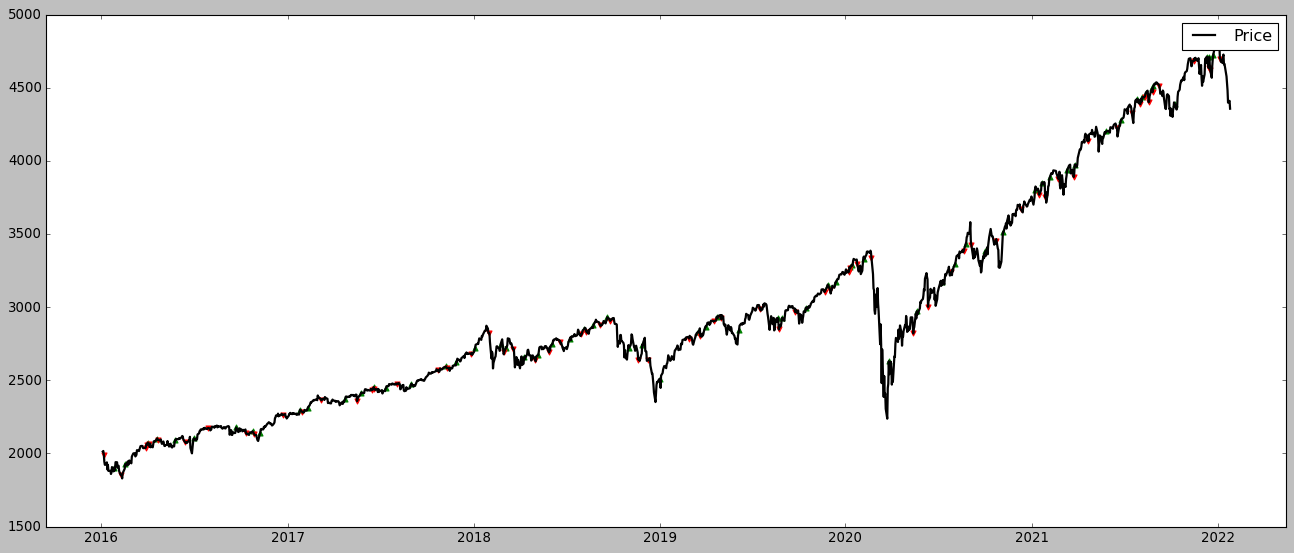

In [123]:
plt.figure(figsize=(20,8))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]["Adj Close"], marker="^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]["Adj Close"], marker="v", color="red")
plt.plot(df["Adj Close"], label="Price", color="k",linewidth =2)
plt.legend()
plt.show()

In [124]:
# let's be real, if the market are closed you can't send orders, so we are adjusting the realbuys and realsells to the moment that we can do that
Realbuys = [i+1 for i in Buy] # one day after the strategy alerts
Realsells=[i+1 for i in Sell]

In [125]:
Buyprices=df["Open"].iloc[Realbuys]
Sellprices=df["Open"].iloc[Realsells]

In [126]:
# Okay but let's consider that we cant sell stocks before we have then and doesn't have too munch sense analyse an open position
if Sellprices.index[0]<Buyprices.index[0]:
    Sellprices=Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1]>Sellprices.index[-1]:
    Buyprices=Buyprices.drop(Buyprices.index[0])

Final Value: $2175.45


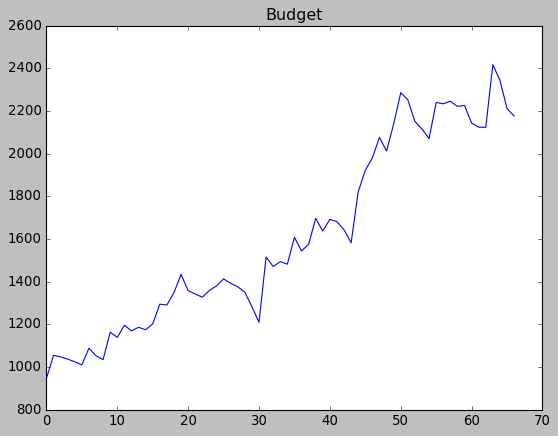

In [127]:
profits=[]
cash=[]
cashreal=[]
budget=1000
for x in range(len(Sellprices)):
    profits.append((Sellprices[x]-Buyprices[x])/Buyprices[x])
    cash.append(Sellprices[x]-Buyprices[x])
for a in range (len(cash)):
    if a==0:
        cashreal.append(budget+cash[a])# budget inicial
    if a!=0:
        cashreal.append(cash[a]+cashreal[a-1])
s=pd.Series(cashreal)
s.to_frame()
s.plot(title="Budget")
print(f"Final Value: ${cashreal[-1]:.2f}")

In [128]:
# Final Report
print(f"Final Value: ${cashreal[-1]:.2f}")
print(f"Percentage Gain in Period: {(cashreal[-1]/budget-1)*100:.2f}%")
print(f"Mean Profit: {statistics.mean(profits)*100:.2f}%")
b_h=(df["Adj Close"][-1]-df["Adj Close"][0])/df["Adj Close"][0]
print(f"Buy & Hold Period: {b_h*100:.2f}%")
print(f"Maximum Drawdown: $ {min(cashreal)-budget:.2f} ")
print(f"Maximum Drawdown: $ {(min(cashreal)-budget)/budget*100:.2f}% ")

Final Value: $2175.45
Percentage Gain in Period: 117.55%
Mean Profit: 0.70%
Buy & Hold Period: 116.45%
Maximum Drawdown: $ -54.06 
Maximum Drawdown: $ -5.41% 
